In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.drop('society', axis=1, inplace=True)

In [8]:
df.dropna(inplace=True)
df.shape

(12710, 8)

In [9]:
df.duplicated().sum()

564

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(12146, 8)

In [11]:
label_encoder = LabelEncoder()
columns = df.select_dtypes(include=['object']).columns

for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

In [12]:
model = LinearRegression()

In [13]:
X_data = df.drop(['price'],axis=1)
Y_data = df[['price']]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [15]:
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
Y_pred = model.predict(X_test)

In [17]:
X_test.shape

(2430, 7)

In [18]:
Y_test.shape

(2430, 1)

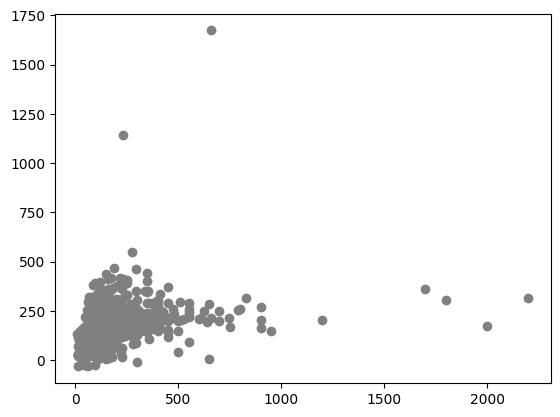

In [19]:
plt.scatter(Y_test,Y_pred,color='gray')
plt.show()

In [20]:
print('Mean abolute error is:', mean_absolute_error(Y_test,Y_pred))
print('Mean squared error is:', mean_squared_error(Y_test,Y_pred))
print('Root mean squared error is:', np.sqrt(mean_squared_error(Y_test,Y_pred)))

Mean abolute error is: 50.50567430823725
Mean squared error is: 12447.775404800408
Root mean squared error is: 111.56959892730819
